# Maschinelles Lernen: Grundlagen

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Die folgenden Überlegungen sind inspiriert von {cite:p} `perrotta_machine_2020`. 

## Zahlenbeispiel

Es gibt zu gewissen Zeiten immer zu wenige Seminarräume für die Lehre. Damit die Auswahl größer ist, fragt mich der Stundenplanmacher, ob denn wirklich immer alle kommen, die in ILIAS angemeldet sind. Denn dann könnte ja auch ein kleinerer Raum ausreichen. Zufällig hat die Mensa das untersucht: sie wollten wissen, ob es öfter Pommes geben sollte.

In [2]:
X, Y = np.loadtxt("../data/ml-fries.txt",skiprows=1,unpack=True)

In [3]:
X[0:5]

array([0., 1., 2., 0., 1.])

Das ist die Anzahl der Menüs mit Pommes am jeweiligen Tag.

In [4]:
Y[0:5]

array([15., 30., 35., 12., 40.])

Das ist die Anzahl der Mensabesucher, die angegeben haben, dass sie in meinem Kurs waren.

(Ja, das ist ein fiktives Beispiel.)

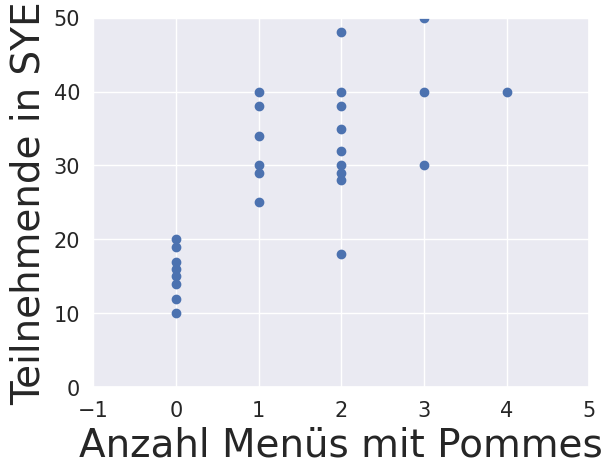

In [5]:
sns.set()
plt.axis([-1,5,0,50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Anzahl Menüs mit Pommes',fontsize=28)
plt.ylabel('Teilnehmende in SYE', fontsize=28)
plt.plot(X,Y,"bo")
plt.show()

Nun könnte es sein, dass da näherungsweise ein linearer Zusammenhang besteht. 

Die einfachste Formel dafür wäre
\begin{equation}
\hat{y} = X\cdot w
\end{equation}

Dabei steht $\hat{y}$ für die laut Modell **vorhergesagte** Anzahl an Teilnehmenden im Kurs SYE. Die Variable $w$ heißt so, weil die Steigung im maschinellen Lernen als Gewicht (englisch *weight*) bezeichnet wird. 

In [6]:
def predict(X,w):
    return X*w

Wir nehmen mal an, dass die Steigung $w=12$ beträgt. 

In [7]:
w = 12
first_try = predict(X,w)

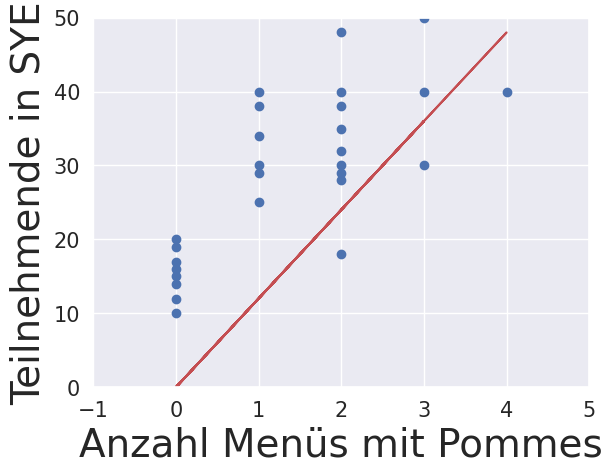

In [8]:
sns.set()
plt.axis([-1,5,0,50])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Anzahl Menüs mit Pommes',fontsize=28)
plt.ylabel('Teilnehmende in SYE', fontsize=28)
plt.plot(X,Y,"bo")
plt.plot(X,first_try,"r-")
plt.show()

Das stimmt nicht so ganz mit den Daten überein. Wir könnten jetzt natürlich, weil das mit einer Gerade so einfach geht, das $w$ manuell anpassen, bis wir zufriedener sind. Aber wir wollen es ja maschinell machen und damit auch für Funktionen, die komplizierter sind als eine einfache Geradengleichung umsetzbar machen. Denn auch das sieht man an den Daten: die lineare Annäherung ist nicht so ganz ausreichend. Es scheint noch mehr Faktoren zu geben als die Anzahl an Menüs mit Pommes, die die Anwesenheit der Studierenden beeinflussen. Vielleicht hat die Bahn gestreikt oder es gab in einem anderen Modul eine dringende Abgabe oder es war Karneval.

Wir sehen uns jetzt dafür den Fehler an, der beim maschinellen Lernen **Verlust** (engl. *loss*) heißt:

In [9]:
error = predict(X,w)-Y

Für unser Beispiel und den Startwert $w=12$ sieht der so aus: 

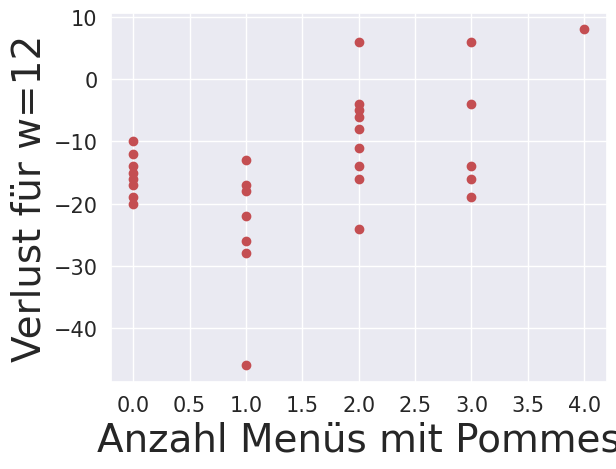

In [10]:
sns.set()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Anzahl Menüs mit Pommes',fontsize=28)
plt.ylabel('Verlust für w=12', fontsize=28)
plt.plot(X,error,"ro")
plt.show()

Diese Formel hat den Nachteil, dass negative Fehlerwerte positive Fehlerwerte kompensieren können. Daher nimmt man wie in der Statistik gerne den quadratischen Fehler.

In [ ]:
squared_error = error**2

In [ ]:
def loss(X,Y,w):
    return np.average((predict(X,w)-Y)**2)

Nun kann ich mit den Daten das Modell trainieren, d.h. in diesem Fall den Parameter $w$ anpassen. 

In [ ]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [ ]:
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)
print("Prediction: x=%d => y=%.2f" % (2, predict(2, w)))

Das Programm hat hier 1626 Iterationen benötigt, um zu konvergieren. D.h. ab diesem Punkt war es egal, ob lr addiert oder subtrahiert wurde, der Verlust wurde nicht mehr kleiner. 

In [ ]:
plt.plot(X, Y, "bo")
plt.xlabel("Pommes Menüs")
plt.ylabel("SYE TN")
x_edge, y_edge = 5, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.ion()
plt.show()

Wer sich nun an daran erinnert, dass Geraden auch einen anderen y-Abschnitt als 0 haben können, kann nun **bias** ergänzen und so das Modell etwas genauer machen.

In [ ]:
def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [ ]:
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (2, predict(2, w, b)))

In [ ]:
plt.plot(X, Y, "bo")
plt.xlabel("Pmmes-Menüs")
plt.ylabel("SYE TN")
x_edge, y_edge = 5, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.ion()
plt.show()

Man könnte auf die Idee kommen, dass ein Seminarraum für 20 TN ausreicht. Die anderen kommen ja nicht immer ... 

Es gibt für dieses Vorgehen auch Funktionen in scikit-learn - aber da fehlt die Transparenz.

Was macht eigentlich der Parameter lr? Er steht für *Learning Rate*. Man könnte denken, je höher die Lernrate, desto schneller lernt das Modell. 

In [ ]:
w1, b1 = train(X, Y, iterations=10000, lr=100)
w2, b2 = train(X, Y, iterations=10000, lr=10)
w3, b3 = train(X, Y, iterations=10000, lr=1)
w4, b4 = train(X, Y, iterations=10000, lr=0.1)
w5, b5 = train(X, Y, iterations=10000, lr=0.01)

In [ ]:
plt.plot(X, Y, "bo")
plt.xlabel("Pmmes-Menüs")
plt.ylabel("SYE TN")
x_edge, y_edge = 5, 50
#plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b1, predict(x_edge, w1, b1)], linewidth=1.0, color="b")
plt.plot([0, x_edge], [b2, predict(x_edge, w2, b2)], linewidth=1.0, color="g")
plt.plot([0, x_edge], [b3, predict(x_edge, w3, b3)], linewidth=1.0, color="r")
plt.plot([0, x_edge], [b4, predict(x_edge, w4, b4)], linewidth=1.0, color="orange")
plt.plot([0, x_edge], [b5, predict(x_edge, w5, b5)], linewidth=1.0, color="black")
plt.ion()
plt.show()

Die Lernrate 100 ist definitiv zu hoch für dieses Modell. Man hätte das auch vermuten können, da die Teilnehmendenzahlen kleiner 100 sind. Der Algorithmus konvergiert mit der x-Achse als Gerade. Die anderen Lernraten ergeben durchaus unterschiedliche Geraden. D.h. eine kleinere Schrittweite ergibt eine bessere Annäherung. Allerdings benötigt man auch mehr Iterationen. Wenn man lr=0.001 wählt, konvergiert der Algorithmus nicht mehr innerhalb der gegebenen Anzahl von Schritten, wird also entsprechend langsam. D.h. eine hohe Lernrate bedeutet im Prinzip, dass das Modell nur oberflächlich und ungenau lernt, dafür aber schnell. Und eine niedrige Lernrate bedeutet, dass das Modell sehr genau lernt, aber dafür sehr langsam.

Um die Rechenressourcen bei komplexeren Modellen nicht unnötig groß zu machen, gibt es als Methoden das Gradientenverfahren (engl. *gradient descent*) und - bei großen Datenmengen - das stochastische Gradientenverfahren {cite:p}`starmer_machine_2023`. Das Gradientenverfahren bildet im Prinzip die Ableitung des Modells an jedem Datenpunkt, um herauszufinden, wo die Steigung am geringsten ist. Dort, wo ein lokales Minimum detektiert wird, sind die Parameter des Modells am besten angepasst. Da dies recht aufwendig wird bei größeren Datenmengen und Modellen mit vielen Parametern, kann man das stochastische Gradientenverfahren mit mini batches von Daten durchführen, also anstatt der gesamten Datenmenge jeweils nur eine kleine zufällig ausgewählte Menge der Daten betrachten. 

## Gradientenverfahren

In [ ]:
def gradient(X,Y,w,b):
    w_gradient = 2*np.average(X*(predict(X,w,0)-Y))
    b_gradient = 2*np.average(predict(X,w,b)-Y)
    return (w_gradient, b_gradient)

In [ ]:
def train(X,Y,iterations,lr):
    w=b=0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i,loss(X,Y,w,0)))
        w_gradient,b_gradient = gradient(X,Y,w,b)
        w -= w_gradient*lr
        b -= b_gradient*lr
    return w,b

In [ ]:
w,b = train(X,Y,iterations=20000,lr=0.001)
print("\nw=%.10f, b=%.10f" % (w,b))
print("Prediction: x=%d => y=%.2f" % (2,predict(2,w,b)))

## Verlustfunktion

In [ ]:
weights = np.linspace(-1,30,200)
losses = [loss(X,Y,w,0) for w in weights]

In [ ]:
plt.axis([-1,30,0,1000])
plt.xlabel("Steigung")
plt.ylabel("Loss/Verlust/Kosten")
plt.plot(weights,losses,color='black')
min_index = np.argmin(losses)
plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)
plt.show()

## Pfad des Gradientenverfahrens

In [ ]:
def train_with_history(X,Y,iterations,lr,precision,initial_w,initial_b):
    w,b = initial_w, initial_b
    previous_loss = loss(X,Y,w,b)
    history = [[w,b,previous_loss]]
    for i in range(0,iterations):
        w_gradient, b_gradient = gradient(X,Y,w,b)
        w -= lr*w_gradient
        b -= lr*b_gradient
        current_loss = loss (X,Y,w,b)
        history.append([w,b,previous_loss])
        if (abs(current_loss - previous_loss) < precision):
            return w,b,history
        previous_loss = current_loss
    raise Exception("Couldn't converge within %d iterations" % iterations)

In [ ]:
w,b,history = train_with_history(X,Y,iterations=100000,lr=0.001,precision=0.000001,initial_w = -10, initial_b = -100)

In [ ]:
history = np.array(history)
history_w = history[:,0]
history_b = history[:,1]
history_loss = history[:,2]

In [ ]:
MESH_SIZE = 20
weights = np.linspace(np.min(history_w) - 10, np.max(history_w) + 10, MESH_SIZE)
biases = np.linspace(np.min(history_b) - 100, np.max(history_b) + 100, MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X,Y,w,b) for w,b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE,MESH_SIZE))

In [ ]:
sns.set(rc={"axes.facecolor": "white", "figure.facecolor":"white"})
ax = plt.figure().gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Steigung/Weight")
ax.set_ylabel("Bias/...")
ax.set_zlabel("Loss/Verlust/Kosten")
ax.plot_surface(W,B,L,cmap=cm.gnuplot,linewidth=0,antialiased=True,color='black')
plt.plot([history_w[-1]],[history_b[-1]],[history_loss[-1]]),"gX",markersize=16)
plt.ion()
plt.plot([history_w[0]],[history_b[0]],[history_loss[0]],"wo")
plt.plot(history_w,history_b,history_loss,color="w",linestyle="dashed")
plt.show()

Das sollte eigentlich den Pfad anzeigen, bis der Wert konvergiert, tut es aber aktuell leider nicht.

Das Buch {cite:p}`starmer_machine_2023` führt in die statistischen Grundlagen des maschinellen Lernens mit vielen Grafiken ein. Beim Lesen wird man mit Zahlen geführt und es ist ein bisschen als ob man einer Videoerklärung oder einer Vorlesung folgt. Tipp: die Stadtbibliothek Köln hat eine e-book-Kopie der deutschen Version.

jupyter notebooks sind häufig bei Fachbüchern zum maschinellen Lernen dabei, z. B. https://github.com/ageron/handson-ml3 

## Neuronale Netze

Ziemlich einfach erklärt das die Masterandin Annika Rüll auf dem Chaos Communication Congress 2023 - hier die Videoaufnahme: https://media.ccc.de/v/37c3-11784-lass_mal_das_innere_eines_neuronalen_netzes_ansehen 

## Bilderkennung mit neuronalen Netzen

{cite:p}`krohn_deep_2020` erklärt Schritt für Schritt, wie das passiert, anhand einem einfachen Beispiel (handschriftliche Zahlenerkennung) und welche Aufgaben die unterschiedlichen Neuronen dabei erfüllen. Das Buch beschreibt dabei auch den Unterschied zwischen shallow und deep learning. 

```{bibliography}
:filter: docname in docnames
```